## Objective:

To identify and assess the potential risks associated with different aircraft types for a new aviation business venture. The goal is to provide actionable insights to guide the purchase of aircraft that minimize risk and maximize profitability.

## Business Understanding

***Problem Statement:*** The aviation industry faces challenges related to aircraft accidents, leading to loss of life, property damage, and economic consequences.

***Objective:*** This analysis aims to gain insights into the factors contributing to aircraft accidents, identify areas for improvement, and inform safety recommendations.

***Data:*** The analysis will be based on a large dataset containing information about aircraft accidents.The columns below will be used to recommend the best aircraft to start a business venture:
        Aircraft Damage,
        Aircraft Category,
        Make,
        Total Fatal Injuries,
        Total Serious Injuries,
        Total Minor Injuries,
        Total Uninjured

## Data Understanding and Analysis

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the Dataset

### Using the pandas library read in the aviationdata.csv

In [31]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('aviationdata.csv')
df

/home/dan/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63998,20080317X00317,Accident,DFW08CA059,2008-01-27,"Sheffield, TX",United States,030260N,0101490W,9TX9,Canon Ranch Airport,Non-Fatal,Substantial,Airplane,N743L,Piper,PA-18-150,No,1.0,Reciprocating,091,NaN,Other Work Use,NaN,0.0,0.0,1.0,0.0,VMC,NaN,The pilot's failure to maintain sufficient air...,25-09-2020
63999,20080205X00136,Accident,DFW08LA058,2008-01-28,"Wiggins, MS",United States,304831N,0891129W,NaN,NaN,Non-Fatal,Substantial,Airplane,N1053F,PIPER,PA32-301FT,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The failure of the fuel servo gasket and subse...,25-09-2020
64000,20080214X00188,Accident,MIA08CA047,2008-01-28,"Dawson, GA",United States,314435N,0084259W,16J,Dawson Municipal Airport,Non-Fatal,Substantial,Airplane,N51367,Cessna,150J,No,1.0,Reciprocating,091,NaN,Instructional,Robert E. Tilley,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
64001,20080305X00269,Accident,DFW08CA063,2008-01-28,"Picayune, MS",United States,302914N,0089394W,MJD,Picayune Municipal Airport,Non-Fatal,Substantial,Airplane,N2905X,Cessna,177,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's misjudgement of the landing flare ...,25-09-2020


### Use the shape method toreturn a tuple representing the dimensions of the dataframe

In [32]:
df.shape

(64003, 31)

### The info method in pandas Dataframe provides a concise summary of the dataframe

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64003 entries, 0 to 64002
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                64003 non-null  object 
 1   Investigation.Type      64003 non-null  object 
 2   Accident.Number         64003 non-null  object 
 3   Event.Date              64003 non-null  object 
 4   Location                63951 non-null  object 
 5   Country                 63777 non-null  object 
 6   Latitude                12056 non-null  object 
 7   Longitude               12046 non-null  object 
 8   Airport.Code            34879 non-null  object 
 9   Airport.Name            37340 non-null  object 
 10  Injury.Severity         64000 non-null  object 
 11  Aircraft.damage         62352 non-null  object 
 12  Aircraft.Category       7843 non-null   object 
 13  Registration.Number     62727 non-null  object 
 14  Make                    63982 non-null

## Data Cleaning

### Create a copy of the dataframe

In [34]:
df1 = df.copy()
df1.sample(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
32560,20001211X12128,Accident,FTW93FA132,1993-04-18,"HENRYETTA, OK",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N4689P,Piper,PA-23-250,No,2.0,Reciprocating,NaN,NaN,Ferry,NaN,1.0,0.0,0.0,0.0,IMC,Climb,Probable Cause,30-06-1994
4335,20001214X42616,Accident,CHI83FA161,1983-04-08,"COULTERVILLE, IL",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N92734,Cessna,182,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN
32046,20001211X11694,Accident,FTW93LA062,1993-01-05,"WICHITA FALLS, TX",United States,NaN,NaN,T47,KICKAPOO,Non-Fatal,Substantial,NaN,N4870B,Cessna,152,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Landing,Probable Cause,13-10-1993


### Filter the Data using the (Amateur.Built column equal to No) and the (Investigation.Type column  equal to Accident)

In [35]:
df1 = df1[(df1['Amateur.Built'] == 'No') & (df1['Investigation.Type'] == 'Accident')]
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Create a Dataframe from only the necessary columns

In [36]:
df1 = df1[['Aircraft.damage', 'Aircraft.Category', 'Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
df1

,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Destroyed,NaN,Stinson,2.0,0.0,0.0,0.0
1,Destroyed,NaN,Piper,4.0,0.0,0.0,0.0
2,Destroyed,NaN,Cessna,3.0,NaN,NaN,NaN
3,Destroyed,NaN,Rockwell,2.0,0.0,0.0,0.0
4,Destroyed,NaN,Cessna,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0
63999,Substantial,Airplane,PIPER,0.0,0.0,0.0,1.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0


## Handling strucrural Errors

### The dtypes attribute in pandas Dataframe returns a series object containg the data types of each column in the Dataframe

In [37]:
df1.dtypes

Aircraft.damage            object
Aircraft.Category          object
Make                       object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
dtype: object

### The str.replace() method in Pandas DataFrames is used to remove spaces and unwanted characters from strings within columns.

In [38]:

df1.columns = df1.columns.str.replace('.', '').str.replace(' ', '')

df1

,Aircraftdamage,AircraftCategory,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
0,Destroyed,NaN,Stinson,2.0,0.0,0.0,0.0
1,Destroyed,NaN,Piper,4.0,0.0,0.0,0.0
2,Destroyed,NaN,Cessna,3.0,NaN,NaN,NaN
3,Destroyed,NaN,Rockwell,2.0,0.0,0.0,0.0
4,Destroyed,NaN,Cessna,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0
63999,Substantial,Airplane,PIPER,0.0,0.0,0.0,1.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0


### The str.title() method in Pandas DataFrames is used to convert the first letter of each word in a string to uppercase and the rest to lowercase.

In [39]:
df1 = df1.assign(Make=df1['Make'].str.title())
df1

,Aircraftdamage,AircraftCategory,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
0,Destroyed,NaN,Stinson,2.0,0.0,0.0,0.0
1,Destroyed,NaN,Piper,4.0,0.0,0.0,0.0
2,Destroyed,NaN,Cessna,3.0,NaN,NaN,NaN
3,Destroyed,NaN,Rockwell,2.0,0.0,0.0,0.0
4,Destroyed,NaN,Cessna,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0
63999,Substantial,Airplane,Piper,0.0,0.0,0.0,1.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0


# Dealing With Missing Data

### The .isna() method in Pandas DataFrames is used to check for missing values in a DataFrame. 

In [40]:
df1.isna().sum()

Aircraftdamage            807
AircraftCategory        49238
Make                        5
TotalFatalInjuries       9568
TotalSeriousInjuries    10493
TotalMinorInjuries       9988
TotalUninjured           4774
dtype: int64

In [41]:
df1.shape

(56087, 7)

## Dropping Rows

### The dropna() method in Pandas DataFrames is used to remove rows or columns containing missing values.

In [42]:
df1 = df1.dropna()
df1

,Aircraftdamage,AircraftCategory,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
7,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0
8,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0
12,Destroyed,Airplane,Bellanca,0.0,0.0,1.0,0.0
13,Destroyed,Airplane,Cessna,1.0,0.0,0.0,0.0
14,Destroyed,Airplane,Navion,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0
63999,Substantial,Airplane,Piper,0.0,0.0,0.0,1.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0


In [43]:
df1.shape

(3336, 7)

In [44]:
df1.isna().sum()

Aircraftdamage          0
AircraftCategory        0
Make                    0
TotalFatalInjuries      0
TotalSeriousInjuries    0
TotalMinorInjuries      0
TotalUninjured          0
dtype: int64

## Creating a new column Total Injured

### Create a column (TotalInjured) that contains the total value of the injured

In [45]:
df1 = df1.assign(TotalInjured=df1['TotalFatalInjuries'] + df1['TotalSeriousInjuries'] + df1['TotalMinorInjuries'])
df1

,Aircraftdamage,AircraftCategory,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjured
7,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0,0.0
8,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0,0.0
12,Destroyed,Airplane,Bellanca,0.0,0.0,1.0,0.0,1.0
13,Destroyed,Airplane,Cessna,1.0,0.0,0.0,0.0,1.0
14,Destroyed,Airplane,Navion,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0,1.0
63999,Substantial,Airplane,Piper,0.0,0.0,0.0,1.0,0.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0,0.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0,0.0


Total uninjured

In [46]:
mean_uninjured = round(df1['TotalUninjured'].mean())
mean_uninjured

2

In [47]:
std_uninjured = df1['TotalUninjured'].std()
std_uninjured

11.654687290558794

In [48]:
mean_injured = round(df1['TotalInjured'].mean())
mean_injured

1

In [49]:
std_injured = df1['TotalInjured'].mean()
std_injured

0.9742206235011991

## Visualization

### Bar Graph visualizing the number of Total Injuries and Aircraft category

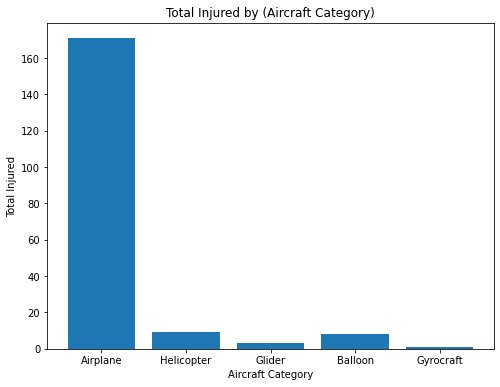

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(df1['AircraftCategory'], df1['TotalInjured'])
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injured')
plt.title('Total Injured by (Aircraft Category)')
plt.show()

In [51]:
X = df1['AircraftCategory'].sample(100).value_counts()
X

Airplane      90
Helicopter     9
Balloon        1
Name: AircraftCategory, dtype: int64

In [52]:
df1[df1['AircraftCategory'] == 'Airplane']

,Aircraftdamage,AircraftCategory,Make,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjured
7,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0,0.0
8,Substantial,Airplane,Cessna,0.0,0.0,0.0,2.0,0.0
12,Destroyed,Airplane,Bellanca,0.0,0.0,1.0,0.0,1.0
13,Destroyed,Airplane,Cessna,1.0,0.0,0.0,0.0,1.0
14,Destroyed,Airplane,Navion,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63998,Substantial,Airplane,Piper,0.0,0.0,1.0,0.0,1.0
63999,Substantial,Airplane,Piper,0.0,0.0,0.0,1.0,0.0
64000,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0,0.0
64001,Substantial,Airplane,Cessna,0.0,0.0,0.0,1.0,0.0


## Bar Graph

### A bar graph is a type of chart used to compare categorical data. 

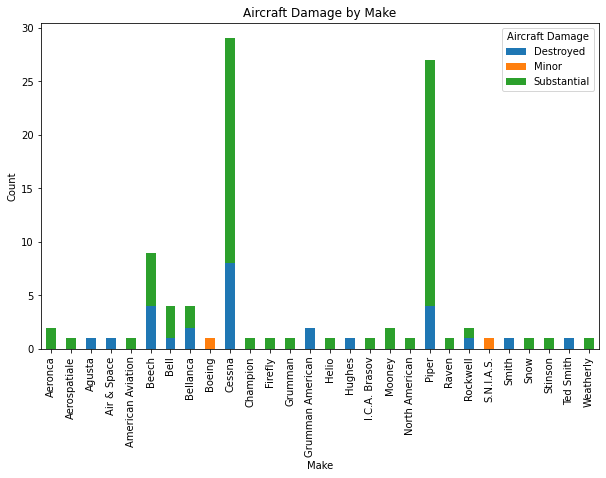

In [53]:
df2 = df1.sample(100)
# Group data and count occurrences
damage_by_make = df2.groupby('Make')['Aircraftdamage'].value_counts().unstack()

# Create a stacked bar chart
damage_by_make.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Aircraft Damage by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='Aircraft Damage')
plt.show()

## Scatter Plot

### A scatter plot is a type of graph used to visualize the relationship between two numerical variables. 

Correlation Coefficient: 0.90


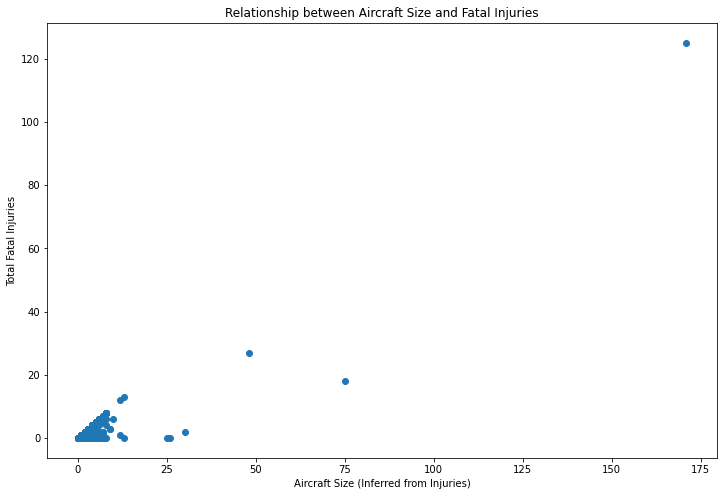

In [54]:
# Calculate a measure of aircraft size based on total injuries
df1['AircraftSize'] = df1['TotalFatalInjuries'] + df1['TotalSeriousInjuries'] + df1['TotalMinorInjuries']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df1['AircraftSize'], df1['TotalFatalInjuries'])
plt.title('Relationship between Aircraft Size and Fatal Injuries')
xlabel = 'Aircraft Size (Inferred from Injuries)'
ylabel = 'Total Fatal Injuries'
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Calculate and display correlation coefficient
correlation = df1['AircraftSize'].corr(df1['TotalFatalInjuries'])
print(f"Correlation Coefficient: {correlation:.2f}")  # Format to 2 decimal places

plt.show()


The scatter plot shows a strong positive correlation between aircraft size (inferred from injuries) and the number of total fatal injuries. This suggests that larger aircraft tend to have more fatal accidents.

The correlation coefficient of 0.90 confirms this strong positive relationship. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. In this case, the high positive correlation indicates that as aircraft size increases, the number of fatal injuries tends to increase as well. 

## Heat Map

### A heatmap is a 2D visualization technique that uses color to represent the magnitude of individual values within a dataset.


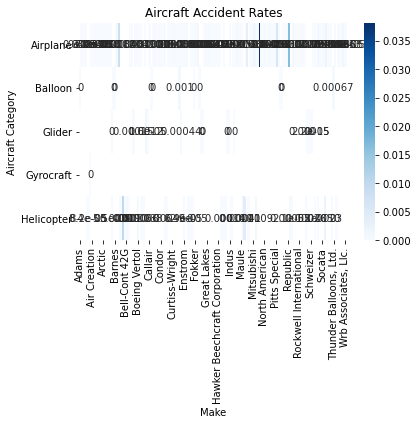

In [55]:

df1['AccidentRate'] = df1['TotalFatalInjuries'] / df1.index  # Assuming index represents aircraft ID

# Create a pivot table to aggregate data
pivot_data = df1.pivot_table(index='AircraftCategory', columns='Make', values='AccidentRate')

# Create a heatmap
sns.heatmap(pivot_data, annot=True, cmap='Blues')
plt.title('Aircraft Accident Rates')
plt.xlabel('Make')
plt.ylabel('Aircraft Category')
plt.show()

### Overall Trend:

Airplane category generally has higher accident rates compared to Helicopter and Balloon.
Helicopter category has the lowest accident rates overall.

### Make-Specific Observations:

Cessna and Piper have relatively high accident rates across multiple categories.
Bellanca and Swearingen have consistently low accident rates.
    

### Category-Specific Observations:

Airplane category shows a wide range of accident rates among different makes.
Helicopter category has more consistent accident rates, with most makes falling within a narrow range.
Balloon category has limited data, but the existing data suggests relatively low accident rates.

## Conclusion:

### Aircraft Category:

The category of aircraft significantly impacts accident rates. Airplanes generally have higher accident rates compared to helicopters and balloons.
Helicopter Safety: Helicopters demonstrate a lower overall accident rate, suggesting they might be inherently safer and therefore best for starting a business venture.

### Specific Observations:

Cessna and Piper: These makes consistently appear in the higher-risk category, indicating potential design or operational issues.
Bellanca and Swearingen: These makes consistently show lower accident rates, suggesting they might have safer designs or operational practices best for starting a business venture.